# A Physics-Informed BiLSTM Autoencoder with Adaptive Physics Loss Weighting for Anomaly Detection on Damped Oscillator Data

In [4]:
# Imports
import sys, importlib
sys.path.append('../utils')

import simulation
importlib.reload(simulation)
from simulation import simulate_trajectory, generate_dataset


import numpy as np
import matplotlib.pyplot as plt


## Simulation

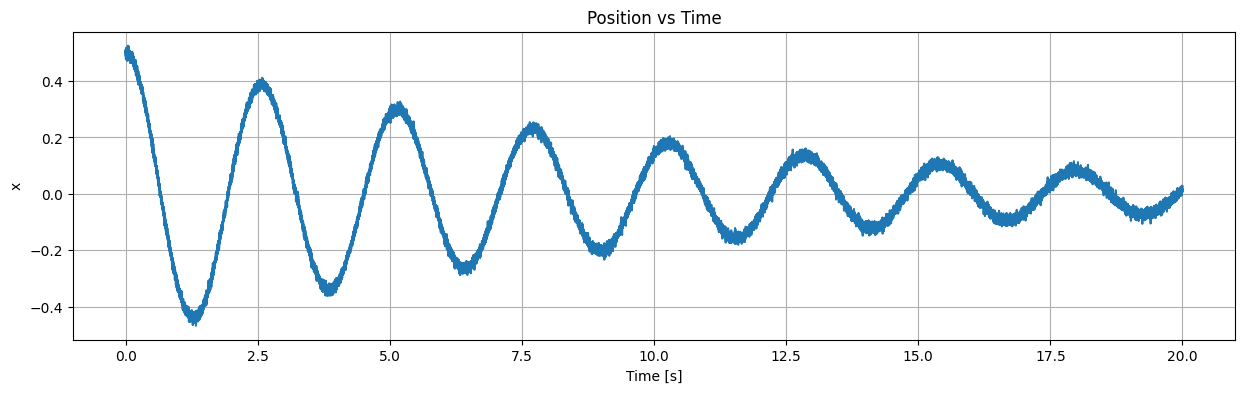

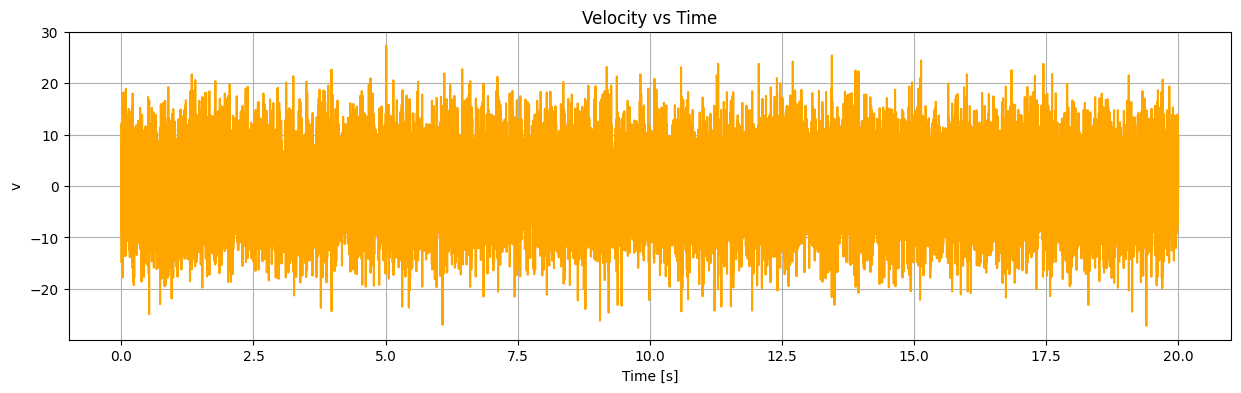

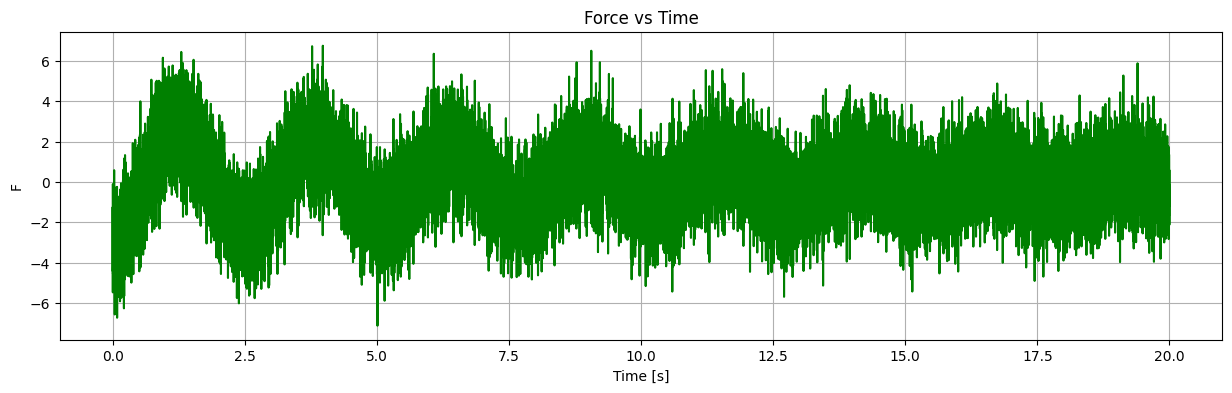

In [ ]:
# Run a simulation (normal) for visualization and setup clarity

# Parameters
m = 1.0
c = 0.2
k = 6.0
x0 = 0.5
v0 = 0.0

T = 20.0
dt = 0.001

t, x = simulate_trajectory(m, c, k, x0, v0, T=T, dt=dt, noise_std=0.01)
v = np.gradient(x, dt)
F = -c * v - k * x

# Dynamics plots
plt.figure(figsize=(15, 4))
plt.plot(t, x, label="x(t)")
plt.title("Position vs Time")
plt.xlabel("Time [s]")
plt.ylabel("x")
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(t, v, label="v(t)", color='orange')
plt.title("Velocity vs Time")
plt.xlabel("Time [s]")
plt.ylabel("v")
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 4))
plt.plot(t, F, label="F(t)", color='green')
plt.title("Force vs Time")
plt.xlabel("Time [s]")
plt.ylabel("F")
plt.grid(True)
plt.show()

In [9]:
# Use generate_dataset function that runs the simulation + injects anomalies + windows data (size 1000) + save dataset in ../data/simulation.npz

generate_dataset(
    num_trajectories = 5,
    save_path = "../data/dataset.npz"
)

Saved dataset to ../data/dataset.npz. Shape: (95, 1000), Labels: (95,)


In [10]:
# Load to verify saving successful and shape of dataset
data = np.load("../data/dataset.npz")
print("X shape:", data["X"].shape)
print("y shape:", data["y"].shape)

X shape: (95, 1000)
y shape: (95,)


Now we have 95 windows, each containing 1000 samples

## Data Preprocessing